## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

Thu Aug 01 18:53:46 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 431.36       Driver Version: 431.36       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1060   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8     5W /  N/A |     92MiB /  6144MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.9106 - acc: 0.3064 - val_loss: 1.7592 - val_acc: 0.3661
Epoch 2/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.7008 - acc: 0.3907 - val_loss: 1.6523 - val_acc: 0.4101
Epoch 3/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.6039 - acc: 0.4287 - val_loss: 1.5907 - val_acc: 0.4299
Epoch 4/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.5542 - acc: 0.4433 - val_loss: 1.5358 - val_acc: 0.4514
Epoch 5/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.4992 - acc: 0.4656 - val_loss: 1.5201 - val_acc: 0.4587
Epoch 6/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.4604 - acc: 0.4784 - val_loss: 1.4959 - val_acc: 0.4711
Epoch 7/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.4318 - acc: 0.4904 - val_loss: 1.4456 -

50000/50000 [==============================] - 4s 74us/step - loss: 0.5003 - acc: 0.8223 - val_loss: 2.0352 - val_acc: 0.5155
Epoch 60/100
50000/50000 [==============================] - 4s 71us/step - loss: 0.5126 - acc: 0.8163 - val_loss: 2.0612 - val_acc: 0.5129
Epoch 61/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.5027 - acc: 0.8209 - val_loss: 2.1332 - val_acc: 0.5076
Epoch 62/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.4662 - acc: 0.8321 - val_loss: 2.2094 - val_acc: 0.5064
Epoch 63/100
50000/50000 [==============================] - 3s 65us/step - loss: 0.4699 - acc: 0.8316 - val_loss: 2.2161 - val_acc: 0.5035
Epoch 64/100
50000/50000 [==============================] - 3s 64us/step - loss: 0.4461 - acc: 0.8404 - val_loss: 2.1709 - val_acc: 0.5134
Epoch 65/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.4487 - acc: 0.8388 - val_loss: 2.2551 - val_acc: 0.5151
Epoch 66/100
50000/50000 [==============

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [11]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    #將每張圖(32,32,3) -> 3072
    if flatten:
        x = x.reshape((len(x), -1))
    return (2 * (x-0) / (255-0)) -1

def preproc_y(y, num_classes=10):
    #OneHotEncode
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [12]:
%reset_selective -f train
%reset_selective -f test
%reset_selective -f x_train
%reset_selective -f x_test

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train.astype('int64'))
x_test = preproc_x(x_test.astype('int64'))

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape):
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu', name='hidden_layer1')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu', name='hidden_layer2')(x)
    x = keras.layers.Dense(units=128, activation='relu', name='hidden_layer3')(x)
    x = keras.layers.Dense(units=64, activation='relu', name='hidden_layer4')(x)
    x = keras.layers.Dense(units=32, activation='relu', name='hidden_layer5')(x)
    output_layer = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model
    
model_5l = build_mlp(input_shape=x_train.shape[1:])
model_5l.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [16]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_5l.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
model_5l.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 78us/step - loss: 1.7301 - acc: 0.3875 - val_loss: 1.5459 - val_acc: 0.4554
Epoch 2/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.4959 - acc: 0.4734 - val_loss: 1.4624 - val_acc: 0.4864
Epoch 3/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.3784 - acc: 0.5165 - val_loss: 1.3895 - val_acc: 0.5134
Epoch 4/100
50000/50000 [==============================] - 3s 68us/step - loss: 1.2833 - acc: 0.5486 - val_loss: 1.3752 - val_acc: 0.5205
Epoch 5/100
50000/50000 [==============================] - 4s 77us/step - loss: 1.1943 - acc: 0.5805 - val_loss: 1.3647 - val_acc: 0.5279
Epoch 6/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.1243 - acc: 0.6044 - val_loss: 1.3616 - val_acc: 0.5322
Epoch 7/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.0430 - acc: 0.6331 - val_loss: 1.3710 - 

50000/50000 [==============================] - 4s 71us/step - loss: 0.1327 - acc: 0.9562 - val_loss: 3.5252 - val_acc: 0.5317
Epoch 60/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.1082 - acc: 0.9649 - val_loss: 3.4974 - val_acc: 0.5359
Epoch 61/100
50000/50000 [==============================] - 4s 70us/step - loss: 0.0848 - acc: 0.9716 - val_loss: 3.6874 - val_acc: 0.5360
Epoch 62/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.0849 - acc: 0.9722 - val_loss: 3.6993 - val_acc: 0.5321
Epoch 63/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.1196 - acc: 0.9606 - val_loss: 3.6723 - val_acc: 0.5295
Epoch 64/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.0960 - acc: 0.9687 - val_loss: 3.6668 - val_acc: 0.5270
Epoch 65/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.0866 - acc: 0.9719 - val_loss: 3.7587 - val_acc: 0.5382
Epoch 66/100
50000/50000 [==============

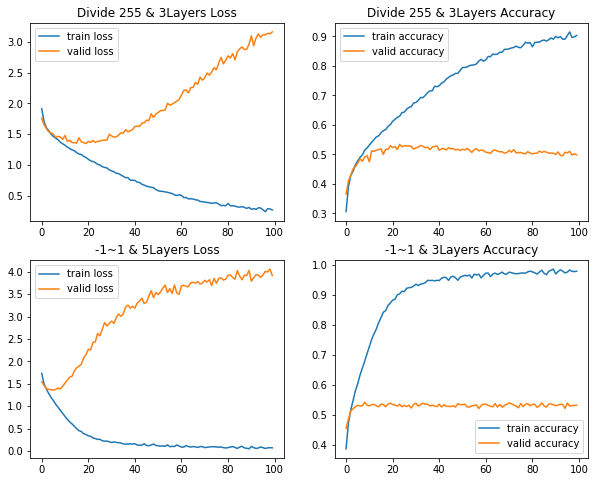

In [18]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

train_loss_5l = model_5l.history.history["loss"]
valid_loss_5l = model_5l.history.history["val_loss"]

train_acc_5l = model_5l.history.history["acc"]
valid_acc_5l = model_5l.history.history["val_acc"]


plt.subplot(2,2,1)
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Divide 255 & 3Layers Loss")

plt.subplot(2,2,2)
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Divide 255 & 3Layers Accuracy")


plt.subplot(2,2,3)
plt.plot(range(len(train_loss_5l)), train_loss_5l, label="train loss")
plt.plot(range(len(valid_loss_5l)), valid_loss_5l, label="valid loss")
plt.legend()
plt.title("-1~1 & 5Layers Loss")

plt.subplot(2,2,4)
plt.plot(range(len(train_acc_5l)), train_acc_5l, label="train accuracy")
plt.plot(range(len(valid_acc_5l)), valid_acc_5l, label="valid accuracy")
plt.legend()
plt.title("-1~1 & 3Layers Accuracy")
plt.show()